In [24]:
import os
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data_dir = "../data/swe-bench/"

In [36]:
def show_task(task):
    for key in ["repo", "query", "patch"]:
        print("#" * 20 + f" {key.capitalize()} " + "#" * 20)
        print(task[key])
    for key in ["patch", "FAIL_TO_PASS"]:
        print("#" * 20 + f" Test {key.capitalize()} " + "#" * 20)
        print(task["tests"][key])

In [12]:
with open(os.path.join(data_dir, "ic_swe_bench.json"), "r") as f:
    swe_bench_all = json.load(f)
print("Total # of all dataset: ", len(swe_bench_all))

Total # of all dataset:  2294


In [20]:
swe_bench_all[0].keys()

dict_keys(['query', 'task_id', 'base_commit', 'repo', 'tests', 'version', 'environment_setup_commit'])

In [13]:
with open(os.path.join(data_dir, "ic_swe_bench_dev.json"), "r") as f:
    swe_bench_dev = json.load(f)
print("Total # of dev dataset: ", len(swe_bench_dev))

Total # of dev dataset:  225


In [14]:
swe_bench_dev[0].keys()

dict_keys(['query', 'task_id', 'base_commit', 'repo', 'patch', 'tests', 'version', 'environment_setup_commit'])

In [29]:
task_lines = [len(task["patch"].split("\n")) for task in swe_bench_dev]
pd.Series(task_lines).describe()

count     225.000000
mean      140.400000
std       182.605033
min        12.000000
25%        29.000000
50%        67.000000
75%       167.000000
max      1119.000000
dtype: float64

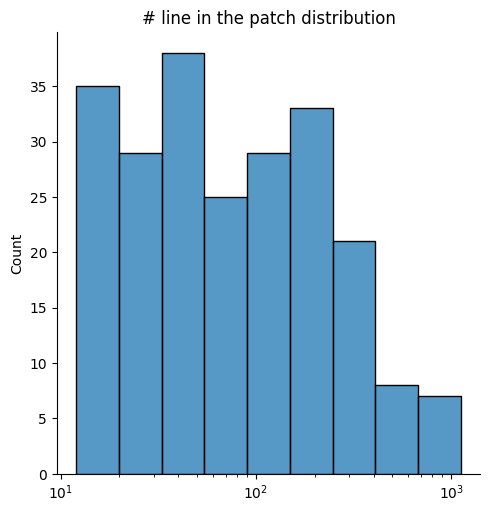

In [30]:
sns.displot(task_lines, log_scale=(True))
plt.title("# line in the patch distribution")
plt.show()

# Easy tasks

In [32]:
swe_bench_dev_sorted = sorted(swe_bench_dev, key=lambda x: len(x["patch"].split("\n")))
swe_bench_dev_sorted[0]

{'query': 'The Perez diffuse model should not be forcing the horizon coefficient up to zero\nThe perez model in irradiance.py forces F2, and thus the horizon component of diffuse, to be non-negative.  This restriction should not happen.  F2 and the horizon coefficient should be allowed to be negative and to reduce overall diffuse.\r\n\r\nAccording to the original paper at https://www.osti.gov/servlets/purl/7024029\r\nSection III.2 states this explicitly for the horizon component:\r\n"(2) The horizon brightening coefficient, F2, is negative for overcast and low E occurrences -- indicative of brightening of the zenithal region of the sky for these conditions. This becomes positive past intermediate conditions and increases substantially with clearness."\r\n\r\nWe observed a higher than expected POAI, coming from poa diffuse, on cloudy days at certain sites.\r\nExpected:\r\nHorizon (burgundy) can be less than zero and sky diffuse (green) is less than isotropic (blue)\r\n![image](https://u

In [37]:
show_task(swe_bench_dev_sorted[0])

#################### Repo ####################
pvlib/pvlib-python
#################### Query ####################
The Perez diffuse model should not be forcing the horizon coefficient up to zero
The perez model in irradiance.py forces F2, and thus the horizon component of diffuse, to be non-negative.  This restriction should not happen.  F2 and the horizon coefficient should be allowed to be negative and to reduce overall diffuse.

According to the original paper at https://www.osti.gov/servlets/purl/7024029
Section III.2 states this explicitly for the horizon component:
"(2) The horizon brightening coefficient, F2, is negative for overcast and low E occurrences -- indicative of brightening of the zenithal region of the sky for these conditions. This becomes positive past intermediate conditions and increases substantially with clearness."

We observed a higher than expected POAI, coming from poa diffuse, on cloudy days at certain sites.
Expected:
Horizon (burgundy) can be less than ze

In [38]:
show_task(swe_bench_dev_sorted[1])

#################### Repo ####################
sqlfluff/sqlfluff
#################### Query ####################
TSQL - L031 incorrectly triggers "Avoid using aliases in join condition" when no join present
## Expected Behaviour

Both of these queries should pass, the only difference is the addition of a table alias 'a':

1/ no alias

```
SELECT [hello]
FROM
    mytable
```

2/ same query with alias

```
SELECT a.[hello]
FROM
    mytable AS a
```

## Observed Behaviour

1/ passes
2/ fails with: L031: Avoid using aliases in join condition.

But there is no join condition :-)

## Steps to Reproduce

Lint queries above

## Dialect

TSQL

## Version

sqlfluff 0.6.9
Python 3.6.9

## Configuration

N/A

#################### Patch ####################
diff --git a/src/sqlfluff/rules/L031.py b/src/sqlfluff/rules/L031.py
--- a/src/sqlfluff/rules/L031.py
+++ b/src/sqlfluff/rules/L031.py
@@ -211,7 +211,7 @@ def _lint_aliases_in_join(
             violation_buff.append(
                 LintResult

# Hard Tasks

In [39]:
show_task(swe_bench_dev_sorted[-1])

#################### Repo ####################
pyvista/pyvista
#################### Query ####################
vtkVolume needs wrapping like vtkActor
We wrap vtkActor nicely and should do the same for vtkVolume to make lookup table modification during volume rendering nicer.

```py
import pyvista as pv
from pyvista import examples

vol = examples.download_knee_full()

p = pv.Plotter(notebook=0)
actor = p.add_volume(vol, cmap="bone", opacity="sigmoid")
actor.mapper.lookup_table.cmap = 'viridis'
p.show()
```

```
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Input In [3], in <cell line: 8>()
      6 p = pv.Plotter(notebook=0)
      7 actor = p.add_volume(vol, cmap="bone", opacity="sigmoid")
----> 8 actor.mapper.lookup_table.cmap = 'viridis'
      9 p.show()

AttributeError: 'vtkmodules.vtkRenderingCore.vtkVolume' object has no attribute 'mapper'
```

#################### Patch ######

# Save Tasks sorted by difficulty

In [40]:
with open(f"{data_dir}/ic_swe_bench_dev_sorted.json", "w") as f:
    json.dump(swe_bench_dev_sorted, fp=f)